In [1]:
# pip install dataframe_image

In [120]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import dataframe_image as df
from scipy.stats import linregress
import scipy.stats as stats

file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [2]:
#removing the '.' in front of the county names
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')

# removing 'Georgia' from the counties
county21 = recent_census21.str.split(',').str[0]

#print(county21)

/Users/jesse/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [3]:
# extracting 2020 and 2021 columns
data21 = recent_census[['2020','2021']]

#convert object to int
census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

#print(census_20)

In [4]:
#convert object to int
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

#print(census_21)

In [5]:
# create a cleaned up dataframe
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

#set index to county
census21_df= organized_21.set_index("County")

#print(census21_df)

In [6]:
#read csv file
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# extract Georgia's data from national data
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
#print(file_2_ga)

In [7]:
#extract the population data of interest
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]

#rename columns
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})

#set index to county
ga_census_20 = ga_census_estimate_population.set_index("County")

#print(ga_census_20)

In [8]:
#merge csv files 

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')

#label column names
column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

#reindex

merge_census = merge_census_raw.reindex(columns=column_names)

#print(merge_census)

In [9]:
# select 10 random counties
samples_df = merge_census.sample(10)

#export randomly selected counties table
samples_df.dfi.export('plots_tables/sample_counties.png')

samples_df

objc[65830]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa45bf6318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x110808f48). One of the two will be used. Which one is undefined.
[0502/101717.248999:INFO:headless_shell.cc(659)] Written to file /var/folders/pr/1_6x41cj4bg9v9n2y7ppnzyc0000gn/T/tmpnnaqv0n0/temp.png.


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Emanuel County,22602,22489,22727,22626,22476,22465,22405,22528,22582,22600,22730,22716
Jones County,28628,28724,28610,28563,28641,28432,28572,28459,28603,28689,28356,28400
Haralson County,28763,28474,28325,28357,28513,28733,28860,29286,29626,29884,29985,30572
Bartow County,100041,100110,100241,100923,101251,102063,103418,105190,106488,107757,109311,110843
Oconee County,32935,33269,33521,34084,35077,35861,36928,38122,39500,40296,42021,43023
Coffee County,42729,42998,43131,43084,42893,42998,42924,42871,43060,43278,43047,43386
Walton County,83997,84647,84998,86068,87557,88373,89886,91389,93450,94818,97135,99853
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513
Rabun County,16276,16257,16303,16184,16159,16224,16493,16560,16853,17116,16894,17119


In [10]:
#Transpose index and column
samples_df.T

County,Emanuel County,Jones County,Haralson County,Bartow County,Oconee County,Coffee County,Walton County,Wilkes County,Rabun County,Butts County
2010,22602,28628,28763,100041,32935,42729,83997,10389,16276,23776
2011,22489,28724,28474,100110,33269,42998,84647,10230,16257,23603
2012,22727,28610,28325,100241,33521,43131,84998,10093,16303,23431
2013,22626,28563,28357,100923,34084,43084,86068,9931,16184,23216
2014,22476,28641,28513,101251,35077,42893,87557,9960,16159,23337
2015,22465,28432,28733,102063,35861,42998,88373,9927,16224,23516
2016,22405,28572,28860,103418,36928,42924,89886,9808,16493,23738
2017,22528,28459,29286,105190,38122,42871,91389,9868,16560,24064
2018,22582,28603,29626,106488,39500,43060,93450,9845,16853,24172
2019,22600,28689,29884,107757,40296,43278,94818,9769,17116,24917


In [11]:
#collect statistics for 19, 20, 21
sample_19= samples_df['2019'].describe()
sample_20 = samples_df['2020'].describe()
sample_21 = samples_df['2020'].describe()

#create new df
sample_stat = pd.DataFrame({'2019': sample_19, '2020': sample_20, '2021': sample_21})

#export
sample_stat.dfi.export('plots_tables/sample_stat.png')

sample_stat


objc[65847]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa45bf6318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x112902f48). One of the two will be used. Which one is undefined.
[0502/101719.736419:INFO:headless_shell.cc(659)] Written to file /var/folders/pr/1_6x41cj4bg9v9n2y7ppnzyc0000gn/T/tmpf382sobf/temp.png.


,2019,2020,2021
count,10.000000,10.000000,10.000000
mean,41912.400000,42457.700000,42457.700000
std,32945.079245,33706.713311,33706.713311
min,9769.000000,9556.000000,9556.000000
25%,23179.250000,23433.000000,23433.000000
50%,29286.500000,29170.500000,29170.500000
75%,42532.500000,42790.500000,42790.500000
max,107757.000000,109311.000000,109311.000000


In [12]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
stat_years =[]

# for loop
for each in years:

    samples_df_data = samples_df[each]
    
    stat_years.append(samples_df_data)
        
# zip into dictionary
year_zip = dict(zip(years, stat_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in year_zip:
    quartiles = year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: 23179.25
The upper quartile of 2019 is: 42532.5
The interquartile range of 2019 is: 19353.25
Values below -5850.625 could be 2019 outliers.
Values above 71562.375 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: 23433.0
The upper quartile of 2020 is: 42790.5
The interquartile range of 2020 is: 19357.5
Values below -5603.25 could be 2020 outliers.
Values above 71826.75 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: 23482.25
The upper quartile of 2021 is: 43295.25
The interquartile range of 2021 is: 19813.0
Values below -6237.25 could be 2021 outliers.
Values above 73014.75 could be 2021 outliers.
--------------------


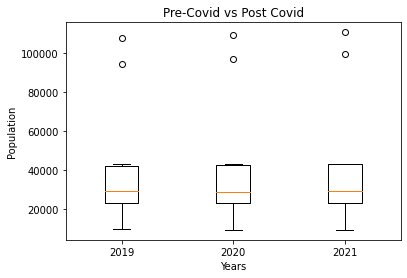

In [13]:
plt.boxplot(stat_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("Population")
plt.title("Pre-Covid vs Post Covid")
plt.savefig('plots_tables/precovidpostcovid.png')
plt.show()

In [14]:
# year to year percent change
samp_change = samples_df.pct_change(axis= 'columns', periods =1)

#dropping 2010 
clean_samp_change = samp_change.drop(columns= ['2010'])
# multiply by 100 for percent
per_samp_change= clean_samp_change*100

#export percent change table
per_samp_change.dfi.export('plots_tables/per_samp_change.png')

per_samp_change

objc[65858]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa45bf6318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x112beef48). One of the two will be used. Which one is undefined.
[0502/101723.559637:INFO:headless_shell.cc(659)] Written to file /var/folders/pr/1_6x41cj4bg9v9n2y7ppnzyc0000gn/T/tmp_6clxkxz/temp.png.


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Emanuel County,-0.499956,1.058295,-0.444405,-0.662954,-0.048941,-0.267082,0.548985,0.239702,0.079710,0.575221,-0.061593
Jones County,0.335336,-0.396881,-0.164278,0.273081,-0.729723,0.492403,-0.395492,0.505991,0.300668,-1.160724,0.155170
Haralson County,-1.004763,-0.523284,0.112974,0.550129,0.771578,0.442000,1.476091,1.160964,0.870857,0.337973,1.957645
Bartow County,0.068972,0.130856,0.680360,0.325000,0.801967,1.327611,1.713435,1.233958,1.191684,1.442134,1.401506
Oconee County,1.014119,0.757462,1.679544,2.913390,2.235083,2.975377,3.233319,3.614711,2.015190,4.280822,2.384522
Coffee County,0.629549,0.309317,-0.108970,-0.443320,0.244795,-0.172101,-0.123474,0.440857,0.506270,-0.533758,0.787511
Walton County,0.773837,0.414663,1.258853,1.730027,0.931964,1.712061,1.672118,2.255195,1.463884,2.443629,2.798167
Wilkes County,-1.530465,-1.339198,-1.605073,0.292015,-0.331325,-1.198751,0.611746,-0.233077,-0.771965,-2.180366,-0.449979
Rabun County,-0.116736,0.282955,-0.729927,-0.154474,0.402253,1.658037,0.406233,1.769324,1.560553,-1.297032,1.331834


In [15]:
#collect statistics for 19, 20, 21
per_samp_19= per_samp_change['2019'].describe()
per_samp_20= per_samp_change['2020'].describe()
per_samp_21= per_samp_change['2021'].describe()

#create new df
per_samp_stat = pd.DataFrame({'2019': per_samp_19, '2020': per_samp_20, '2021': per_samp_19})

per_samp_stat


,2019,2020,2021
count,10.000000,10.000000,10.000000
mean,1.029893,0.641623,1.029893
std,1.088280,2.029368,1.088280
min,-0.771965,-2.180366,-0.771965
25%,0.352068,-1.003982,0.352068
50%,1.031270,0.456597,1.031270
75%,1.536386,2.193255,1.536386
max,3.082078,4.280822,3.082078


In [16]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
per_stat_years =[]

# for loop
for each in years:
    per_samples_df_data = per_samp_change[each]
    per_stat_years.append(per_samples_df_data)
        
# zip into dictionary
per_year_zip = dict(zip(years, per_stat_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in year_zip:
    quartiles = per_year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: 0.35206840171290166
The upper quartile of 2019 is: 1.5363858704943611
The interquartile range of 2019 is: 1.1843174687814595
Values below -1.4244078014592876 could be 2019 outliers.
Values above 3.31286207366655 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: -1.0039823396237852
The upper quartile of 2020 is: 2.1932550575552323
The interquartile range of 2020 is: 3.1972373971790176
Values below -5.799838435392312 could be 2020 outliers.
Values above 6.989111153323758 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: 0.3132553174540531
The upper quartile of 2021 is: 1.8186105659063145
The interquartile range of 2021 is: 1.5053552484522614
Values below -1.9447775552243391 could be 2021 outliers.
Values above 4.076643438584707 could be 2021 outliers.
--------------------


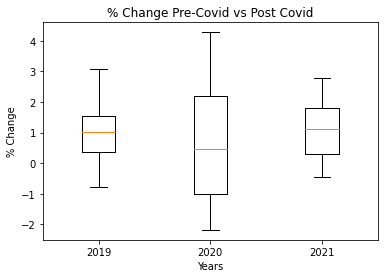

In [17]:
plt.boxplot(per_stat_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("% Change")
plt.title("% Change Pre-Covid vs Post Covid")
plt.savefig('plots_tables/per_precovidpostcovid.png')
plt.show()

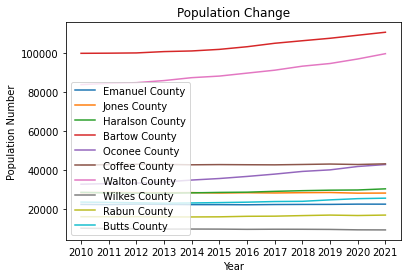

In [18]:
# plot sampled counties 
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change")
plt.xlabel("Year")
plt.ylabel("Population Number")

#save figure 
plt.savefig('plots_tables/sample_counties_plot.png')
plt.show()

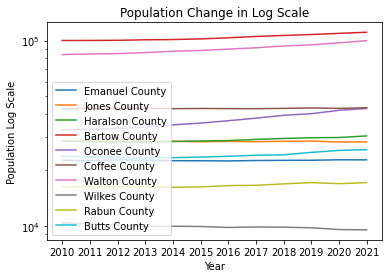

In [19]:
#plot sampled counties in log scale
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change in Log Scale")
plt.xlabel("Year")
plt.ylabel("Population Log Scale")

#set log scale
plt.yscale('log')

#save figure
plt.savefig('plots_tables/sample_counties_plot_logscale.png')

plt.show()


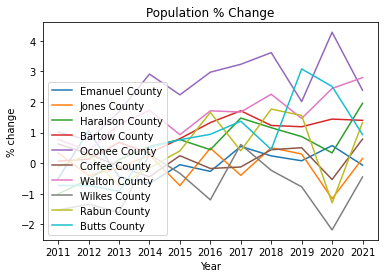

In [20]:
#plot percent change
plt.plot(per_samp_change.T);
plt.legend(per_samp_change.index,loc="lower left")

#labeling
plt.title("Population % Change")
plt.xlabel("Year")
plt.ylabel("% change")
plt.savefig('plots_tables/per_samp_change_plot.png')
plt.show()

The 10 counties are randomized when the kernal is restarted, but the counties that were selected are hard coded. These following counties are hard coded in reference to the initial merged dataframe.

In [21]:
#recreate original data frame that was used for all the plots 

paulding = merge_census.loc['Paulding County',:]
worth = merge_census.loc['Worth County',:]
grady = merge_census.loc['Grady County',:]
laurens = merge_census.loc['Laurens County',:]
barrow = merge_census.loc['Barrow County',:]
newton = merge_census.loc['Newton County',:]
pike = merge_census.loc['Pike County',:]
chatham = merge_census.loc['Chatham County',:]
fulton = merge_census.loc['Fulton County',:]
dodge = merge_census.loc['Dodge County',:]

ppt_counties = pd.DataFrame({"Paulding County":paulding, "Worth County": worth,
                             "Grady County": grady, "Laurens County": laurens,
                             "Barrow County": barrow, "Newton County": newton,
                             "Pike County": pike, "Chatham County": chatham,
                             "Fulton County": fulton, "Dodge County": dodge
                            })
#transpose index and columns
ppt_counties.T

#rename df
sample_counties = ppt_counties.T

sample_counties

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Paulding County,142826,143606,144750,146775,148562,151691,155415,159642,164482,169302,169660,173780
Worth County,21692,21516,21356,21058,21010,20692,20732,20532,20307,20185,20719,20554
Grady County,25027,25103,25283,25120,25236,25106,24895,24762,24730,24588,26221,25918
Laurens County,48388,47841,47819,47727,47553,47491,47287,47362,47293,47567,49497,49547
Barrow County,69670,69835,70128,71233,72843,74979,77108,79086,81105,83581,83963,86658
Newton County,100128,100446,100965,102060,103470,104920,106529,107903,109556,111894,112780,115355
Pike County,17929,17792,17780,17784,17774,17935,17916,18213,18622,18953,18935,19477
Chatham County,265799,271665,276243,277790,282396,286239,289055,289771,289771,290185,294904,296329
Fulton County,925622,947582,973464,981844,992321,1005752,1023816,1039996,1051516,1065019,1069023,1065334
Dodge County,21756,21606,21511,21424,21167,21133,20866,20777,20858,20672,19849,19759


In [22]:
#collect statistics for 19, 20, 21
sample_counties_19 = round(sample_counties['2019'].describe(),0)
sample_counties_20 = round(sample_counties['2020'].describe(),0)
sample_counties_21 = round(sample_counties['2020'].describe(),0)

#create new df
sample_counties_stat = pd.DataFrame({'2019': sample_counties_19, '2020': sample_counties_20, '2021': sample_counties_21})

#export
sample_counties_stat.dfi.export('plots_tables/sample_counties_stat.png')

sample_counties_stat

objc[65878]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa45bf6318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x111fbff48). One of the two will be used. Which one is undefined.
[0502/101736.063872:INFO:headless_shell.cc(659)] Written to file /var/folders/pr/1_6x41cj4bg9v9n2y7ppnzyc0000gn/T/tmpupovrtvo/temp.png.


,2019,2020,2021
count,10.0,10.0,10.0
mean,185195.0,186555.0,186555.0
std,321063.0,322253.0,322253.0
min,18953.0,18935.0,18935.0
25%,21651.0,22094.0,22094.0
50%,65574.0,66730.0,66730.0
75%,154950.0,155440.0,155440.0
max,1065019.0,1069023.0,1069023.0


In [23]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
ppt_years =[]

# for loop
for each in years:

    ppt_samples = sample_counties[each]
    
    ppt_years.append(ppt_samples)
        
# zip into dictionary
ppt_year_zip = dict(zip(years, ppt_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in ppt_year_zip:
    quartiles = ppt_year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: 21651.0
The upper quartile of 2019 is: 154950.0
The interquartile range of 2019 is: 133299.0
Values below -178297.5 could be 2019 outliers.
Values above 354898.5 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: 22094.5
The upper quartile of 2020 is: 155440.0
The interquartile range of 2020 is: 133345.5
Values below -177923.75 could be 2020 outliers.
Values above 355458.25 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: 21895.0
The upper quartile of 2021 is: 159173.75
The interquartile range of 2021 is: 137278.75
Values below -184023.125 could be 2021 outliers.
Values above 365091.875 could be 2021 outliers.
--------------------


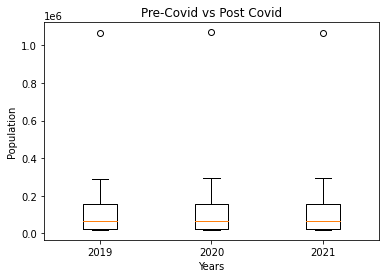

In [24]:
plt.boxplot(ppt_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("Population")
plt.title("Pre-Covid vs Post Covid")
plt.savefig('plots_tables/pptcovidpostcovid.png')
plt.show()

In [25]:
#percent change
samp_change = sample_counties.pct_change(axis= 'columns', periods =1)

#drop 2010 
samp_change = samp_change.drop(columns=['2010'])
#multiply by 100 for percent
per_samp_change= samp_change*100

per_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Paulding County,0.546119,0.796624,1.398964,1.217510,2.106191,2.454991,2.719815,3.031784,2.930412,0.211456,2.428386
Worth County,-0.811359,-0.743633,-1.395392,-0.227942,-1.513565,0.193311,-0.964692,-1.095850,-0.600778,2.645529,-0.796370
Grady County,0.303672,0.717046,-0.644702,0.461783,-0.515137,-0.840437,-0.534244,-0.129230,-0.574201,6.641451,-1.155562
Laurens County,-1.130446,-0.045986,-0.192392,-0.364574,-0.130381,-0.429555,0.158606,-0.145686,0.579367,4.057435,0.101016
Barrow County,0.236831,0.419560,1.575690,2.260188,2.932334,2.839462,2.565233,2.552917,3.052833,0.457042,3.209747
Newton County,0.317593,0.516696,1.084534,1.381540,1.401372,1.533549,1.289790,1.531931,2.134068,0.791821,2.283206
Pike County,-0.764125,-0.067446,0.022497,-0.056230,0.905817,-0.105938,1.657736,2.245649,1.777468,-0.094972,2.862424
Chatham County,2.206931,1.685164,0.560014,1.658087,1.360855,0.983793,0.247704,0.000000,0.142871,1.626204,0.483208
Fulton County,2.372459,2.731373,0.860843,1.067074,1.353493,1.796069,1.580362,1.107697,1.284146,0.375956,-0.345081
Dodge County,-0.689465,-0.439693,-0.404444,-1.199589,-0.160627,-1.263427,-0.426531,0.389854,-0.891744,-3.981231,-0.453423


In [26]:
#collect statistics for 19, 20, 21
per_sample_counties_19 = round(per_samp_change['2019'].describe(),3)
per_sample_counties_20 = round(per_samp_change['2020'].describe(),3)
per_sample_counties_21 = round(per_samp_change['2020'].describe(),3)

#create new df
per_sample_counties_stat = pd.DataFrame({'2019': per_sample_counties_19, '2020': per_sample_counties_20, '2021': per_sample_counties_21})

#export
per_sample_counties_stat.dfi.export('plots_tables/per_sample_counties_stat.png')

per_sample_counties_stat

objc[65888]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa45bf6318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x11293cf48). One of the two will be used. Which one is undefined.
[0502/101739.513698:INFO:headless_shell.cc(659)] Written to file /var/folders/pr/1_6x41cj4bg9v9n2y7ppnzyc0000gn/T/tmpim428rsq/temp.png.


,2019,2020,2021
count,10.000,10.000,10.000
mean,0.983,1.273,1.273
std,1.470,2.807,2.807
min,-0.892,-3.981,-3.981
25%,-0.395,0.253,0.253
50%,0.932,0.624,0.624
75%,2.045,2.391,2.391
max,3.053,6.641,6.641


In [27]:
# create list of years of interest to loop over 
years =['2019', '2020', '2021']

#empty list
per_ppt_years =[]

# for loop
for each in years:

    per_ppt_samples = per_samp_change[each]
    
    per_ppt_years.append(per_ppt_samples)
        
# zip into dictionary
per_ppt_year_zip = dict(zip(years, per_ppt_years))

#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds

for each in per_ppt_year_zip:
    quartiles = per_ppt_year_zip[each].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print("--------------------")
    print(f"The lower quartile of {each} is: {lowerq}")
    print(f"The upper quartile of {each} is: {upperq}")
    print(f"The interquartile range of {each} is: {iqr}")
    print(f"Values below {lower_bound} could be {each} outliers.")
    print(f"Values above {upper_bound} could be {each} outliers.")
    print("--------------------")

--------------------
The lower quartile of 2019 is: -0.3949331711709858
The upper quartile of 2019 is: 2.0449181941082193
The interquartile range of 2019 is: 2.439851365279205
Values below -4.0547102190897935 could be 2019 outliers.
Values above 5.704695242027027 could be 2019 outliers.
--------------------
--------------------
The lower quartile of 2020 is: 0.2525812714830544
The upper quartile of 2020 is: 2.3906976368790356
The interquartile range of 2020 is: 2.138116365395981
Values below -2.9545932766109173 could be 2020 outliers.
Values above 5.597872184973007 could be 2020 outliers.
--------------------
--------------------
The lower quartile of 2021 is: -0.4263378705791354
The upper quartile of 2021 is: 2.392091198660112
The interquartile range of 2021 is: 2.8184290692392473
Values below -4.653981474438006 could be 2021 outliers.
Values above 6.619734802518983 could be 2021 outliers.
--------------------


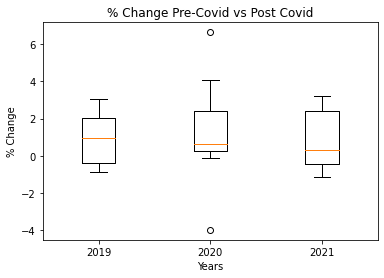

In [28]:
plt.boxplot(per_ppt_years)    
plt.xlabel("Years")
plt.xticks([1,2,3], years)
plt.ylabel("% Change")
plt.title("% Change Pre-Covid vs Post Covid")
plt.savefig('plots_tables/perpptcovidpostcovid.png')
plt.show()

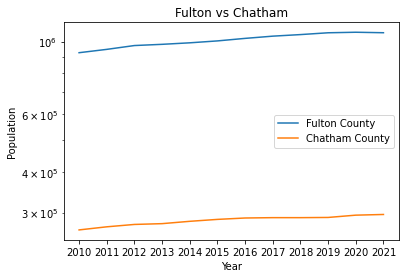

In [29]:
#compare the population change between Fulton and Chatham 
plt.plot(sample_counties.T['Fulton County'], label='Fulton County' );
plt.plot(sample_counties.T['Chatham County'], label='Chatham County' );
plt.legend(loc="best")
plt.yscale('log')

#labeling 
plt.title("Fulton vs Chatham")
plt.xlabel("Year")
plt.ylabel("Population")

#save figure
plt.savefig('plots_tables/fulton_chatham_plot.png')
plt.show()

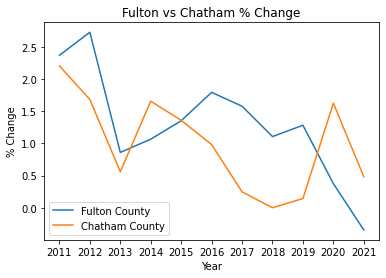

In [30]:
#compare % change between Fulton and Chatham
plt.plot(per_samp_change.T['Fulton County'], label='Fulton County');
plt.plot(per_samp_change.T['Chatham County'], label='Chatham County');
plt.legend(loc="lower left")

#labeling 
plt.title("Fulton vs Chatham % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/fulton_chatham_change_plot.png')
plt.show()

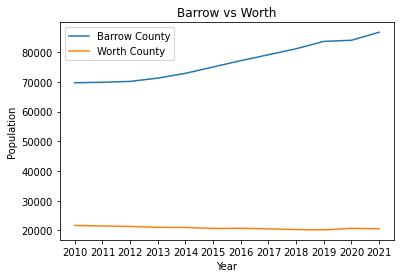

In [31]:
#compare population change between Barrow and County 
plt.plot(sample_counties.T['Barrow County'], label='Barrow County' );
plt.plot(sample_counties.T['Worth County'], label='Worth County' );
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/barrow_worth_plot.png')
plt.show()

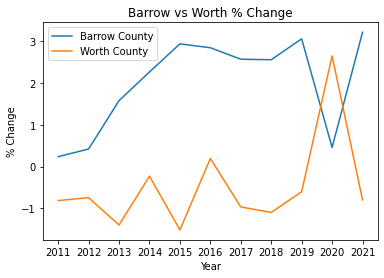

In [32]:
#compare % change between Barrow and Worth
plt.plot(per_samp_change.T['Barrow County'], label='Barrow County');
plt.plot(per_samp_change.T['Worth County'], label='Worth County');
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/barrow_worth_change_plot.png')
plt.show()

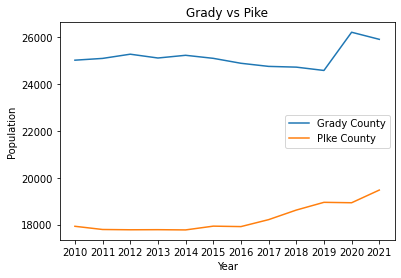

In [33]:
#compare the population change between Grady and Pike 
plt.plot(sample_counties.T['Grady County'], label='Grady County' );
plt.plot(sample_counties.T['Pike County'], label='PIke County' );
plt.legend(loc="best")

#labeling 
plt.title("Grady vs Pike")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/grady_pike_plot.png')
plt.show()

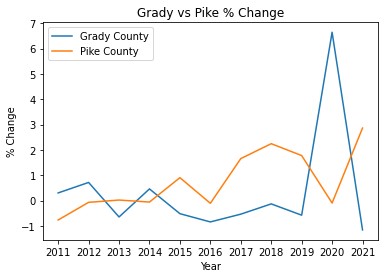

In [34]:
#compare % change between Grady and Pike
plt.plot(per_samp_change.T['Grady County'], label='Grady County');
plt.plot(per_samp_change.T['Pike County'], label='Pike County');
plt.legend(loc="best")
#labeling 
plt.title("Grady vs Pike % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/grady_pike_change_plot.png')
plt.show()

In [35]:
# setting the x and y axis 
fulton_years = sample_counties.T['Fulton County'].index.astype(float)
fulton_pop = sample_counties.T['Fulton County']

The r-squared is: 0.9674131773839155


<function matplotlib.pyplot.show(close=None, block=None)>

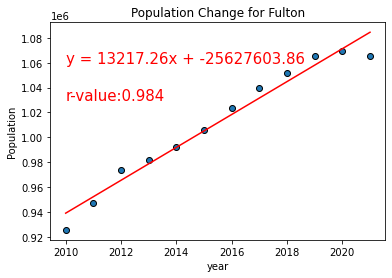

In [36]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_years,fulton_pop)
regress_values = fulton_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_years, fulton_pop, edgecolor = "black")

# draw our regression line
plt.plot(fulton_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,1060000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,1030000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Fulton")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/fulton_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [37]:
# setting the x and y axis 
fulton_per = per_samp_change.T['Fulton County']
fulton_per_year = per_samp_change.T['Fulton County'].index.astype(float)

The r-squared is: 0.5665640906797725


<function matplotlib.pyplot.show(close=None, block=None)>

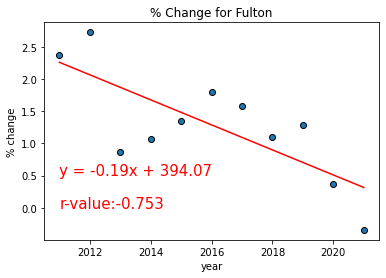

In [38]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_per_year,fulton_per)
regress_values = fulton_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_per_year, fulton_per, edgecolor = "black")

# draw our regression line
plt.plot(fulton_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Fulton")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/fulton_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [39]:
# setting the x and y axis 
chatham_years = sample_counties.T['Chatham County'].index.astype(float)
chatham_pop = sample_counties.T['Chatham County']

The r-squared is: 0.9337720205022065


<function matplotlib.pyplot.show(close=None, block=None)>

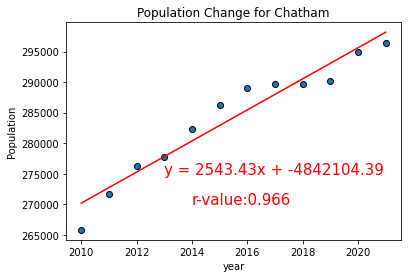

In [40]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_years,chatham_pop)
regress_values = chatham_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_years, chatham_pop, edgecolor = "black")

# draw our regression line
plt.plot(chatham_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2013,275000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,270000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Chatham")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/chatham_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [41]:
# setting the x and y axis 
chatham_per = per_samp_change.T['Chatham County']
chatham_per_year = per_samp_change.T['Chatham County'].index.astype(float)

The r-squared is: 0.3403660066509063


<function matplotlib.pyplot.show(close=None, block=None)>

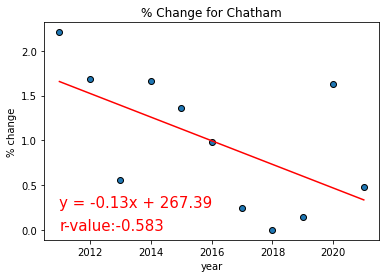

In [42]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_per_year,chatham_per)
regress_values = chatham_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_per_year, chatham_per, edgecolor = "black")

# draw our regression line
plt.plot(chatham_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Chatham")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/chatham_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [43]:
# setting the x and y axis 
grady_years = sample_counties.T['Grady County'].index.astype(float)
grady_pop = sample_counties.T['Grady County']

The r-squared is: 0.09159820413588947


<function matplotlib.pyplot.show(close=None, block=None)>

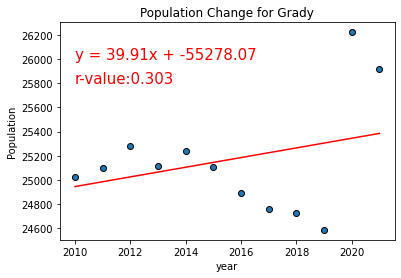

In [44]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_years,grady_pop)
regress_values = grady_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_years, grady_pop, edgecolor = "black")

# draw our regression line
plt.plot(grady_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,26000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,25800), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Grady")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/grady_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [45]:
# setting the x and y axis 
grady_per = per_samp_change.T['Grady County']
grady_per_year = per_samp_change.T['Grady County'].index.astype(float)

The r-squared is: 0.04592530592906027


<function matplotlib.pyplot.show(close=None, block=None)>

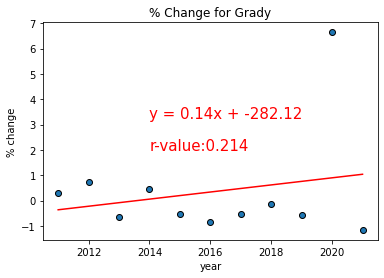

In [46]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_per_year,grady_per)
regress_values = grady_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_per_year, grady_per, edgecolor = "black")

# draw our regression line
plt.plot(grady_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,3.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,2), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Grady")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/grady_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [47]:
# setting the x and y axis 
worth_years = sample_counties.T['Worth County'].index.astype(float)
worth_pop = sample_counties.T['Worth County']

The r-squared is: 0.7764997093787491


<function matplotlib.pyplot.show(close=None, block=None)>

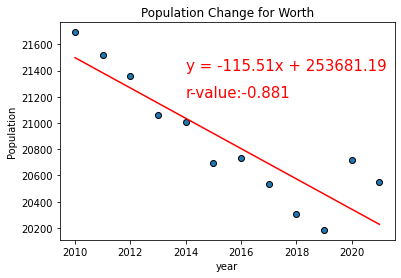

In [48]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_years,worth_pop)
regress_values = worth_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_years, worth_pop, edgecolor = "black")

# draw our regression line
plt.plot(worth_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,21400),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,21200), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Worth")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/worth_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [49]:
# setting the x and y axis 
worth_per = per_samp_change.T['Worth County']
worth_per_year = per_samp_change.T['Worth County'].index.astype(float)

The r-squared is: 0.15259008460634854


<function matplotlib.pyplot.show(close=None, block=None)>

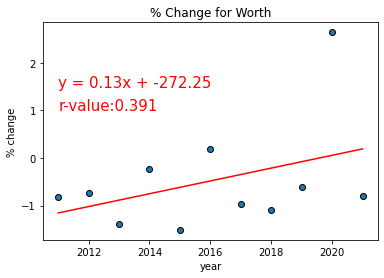

In [50]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_per_year,worth_per)
regress_values = worth_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_per_year, worth_per, edgecolor = "black")

# draw our regression line
plt.plot(worth_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,1.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,1), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Worth")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/worth_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

## Jesse's Stats Analysis Below

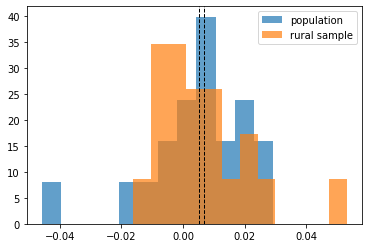

In [75]:
# categorizing counties as being either Rural or Urban and creating new dataframe 
# orienting "population change rate" instead of raw population

# merge_census
rural_counties = merge_census.loc[merge_census['2020'] < 50000, :] 
rural_normalized = rural_counties.pct_change(axis='columns', periods=1)
rural_normalized = rural_normalized.drop(columns=['2010'])
urban_counties = merge_census.loc[merge_census['2020'] > 50000, :] 
urban_counties = urban_counties.drop(["Georgia"])
urban_normalized = urban_counties.pct_change(axis='columns', periods=1)
urban_normalized = urban_normalized.drop(columns=['2010'])
merge_normalized = merge_census.pct_change(axis='columns', periods=1)
merge_normalized = merge_normalized.drop(columns=['2010'])

# variables created
# urban_counties, rural_counties, rural_normalized, urban_normalized, merge_normalized

plt.hist(merge_normalized["2021"].sample(20), 12, density=True, alpha=0.7, label="population")
plt.hist(rural_normalized["2021"].sample(20), 12, density=True, alpha=0.7, label="rural sample")
plt.axvline(merge_normalized["2021"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(rural_normalized["2021"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [60]:
(urban_normalized.mean() * 100).round(2)

2011    0.96
2012    0.85
2013    0.70
2014    1.06
2015    1.12
2016    1.29
2017    1.21
2018    1.17
2019    1.29
2020    1.10
2021    1.10
dtype: float64

In [61]:
(rural_normalized.mean() * 100).round(2)

2011   -0.23
2012   -0.36
2013   -0.39
2014   -0.14
2015   -0.02
2016   -0.04
2017    0.26
2018    0.32
2019    0.41
2020   -1.33
2021    0.52
dtype: float64

In [135]:
(merge_normalized.mean() * 100).round(2)

2011    0.09
2012   -0.04
2013   -0.10
2014    0.18
2015    0.28
2016    0.31
2017    0.51
2018    0.54
2019    0.64
2020   -0.70
2021    0.67
dtype: float64

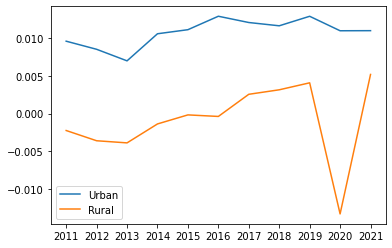

In [62]:
plt.plot(urban_normalized.mean(),label='Urban')
plt.plot(rural_normalized.mean(),label='Rural')
plt.legend()
plt.show()

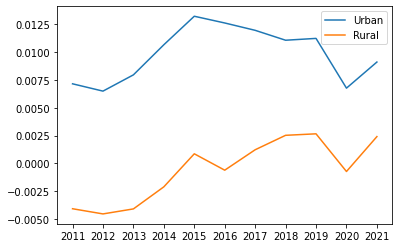

In [63]:
plt.plot(urban_normalized.median(),label='Urban')
plt.plot(rural_normalized.median(),label='Rural')
plt.legend()
plt.show()

In [68]:
merge_normalized["2021"].sample(10)

County
Bartow County      0.014015
Pulaski County     0.005475
Gordon County      0.009377
Pickens County     0.020730
Berrien County    -0.000661
Decatur County    -0.010226
Bulloch County     0.013075
Cherokee County    0.024518
Glynn County       0.003185
Marion County     -0.010638
Name: 2021, dtype: float64

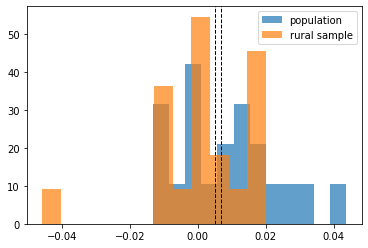

In [74]:
plt.hist(merge_normalized["2021"].sample(20), 12, density=True, alpha=0.7, label="population")
plt.hist(rural_normalized["2021"].sample(20), 12, density=True, alpha=0.7, label="rural sample")
plt.axvline(merge_normalized["2021"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(rural_normalized["2021"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [131]:
rural = rural_normalized["2021"].sample(10)
rural = rural.reset_index()
rural = rural["2021"]
# rural

observed = merge_normalized["2021"].sample(10)
observed = observed.reset_index()
observed = observed["2021"]
observed
# observed = merge_normalized["2021"].sample(10).to_list()
# rural.to_list()
df=pd.concat([rural,observed],axis=1)
df.columns= ['rural', 'all']



In [127]:
gross_mean = merge_normalized['2021'].mean()

In [134]:
stats.ttest_1samp(df['rural'], gross_mean)

Ttest_1sampResult(statistic=-0.41347072821689096, pvalue=0.6889399579094846)

In [133]:
df['rural']

0   -0.008133
1    0.007875
2   -0.045771
3    0.027284
4   -0.004500
5    0.008722
6   -0.010638
7    0.022851
8    0.016578
9    0.023845
Name: rural, dtype: float64

In [ ]:
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 9)
critical_value

In [ ]:
#playing with chisquare
ruralNormalized = df['rural']/df['rural'].sum() 
allNormalized = df['all']/df['all'].sum() 
stats.chisquare(ruralNormalized, allNormalized)